<a href="https://colab.research.google.com/github/idanwekhai/My-Jupyter-Noteboks/blob/master/kelvinidanwekhai_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&access_type=offline


Enter verification code: 4/BwGoIE0KwA9Xg7hiv3FYG9jM7DNIcSAPVOlqIeSQL7il0yGpuPOhUQg
If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [kelvinidanwekhai@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [2]:
!gcloud config set project propane-highway-202915 

Updated property [core/project].


In [3]:
!gcloud source repos clone  arise-ds-program --project=propane-highway-202915 

Cloning into '/content/arise-ds-program'...
remote: Sending approximately 14.37 MiB ...
remote: Total 74 (delta 35), reused 74 (delta 35)
Unpacking objects: 100% (74/74), done.
Project [propane-highway-202915] repository [arise-ds-program] was cloned to [/content/arise-ds-program].


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [0]:
data  = pd.read_csv('arise-ds-program/Week3/week3_challenge.csv')

In [6]:
data.head(4)

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee


In [7]:
data.shape

(11993, 290)

# Columns With More Than 30% missing Data

In [8]:
columns_with_more_than_30_percent_missing_data = data.loc[:, data.isna().mean()*100 > 30]
columns_with_more_than_30_percent_missing_data.shape

(11993, 18)

# New Data

In [9]:
new_data  = data.loc[:, data.isna().mean()*100 < 30]
new_data.shape

(11993, 272)

# Data With Numeric Columns

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_with_numeric_columns = new_data.select_dtypes(include=numerics)
data_with_numeric_columns.shape

(11993, 249)

In [0]:
data_with_numeric_columns = data_with_numeric_columns.fillna(0)

In [12]:
scaled_features = Normalizer().fit_transform(data_with_numeric_columns.values)  # Normalizer gives a higher explained variance ratio than StandardScaler
#scaled_features = StandardScaler().fit_transform(data_with_numeric_columns.values)
scaled_data = pd.DataFrame(scaled_features, index=data_with_numeric_columns.index, columns=data_with_numeric_columns.columns)
scaled_data.head()

,Unnamed: 0,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,0.000000e+00,6.663062e-07,0.001103,0.999999,3.301618e-12,6.603236e-07,0.0,6.603236e-07,3.301618e-12,9.244531e-11,...,2.162560e-09,0.000000e+00,0.0,1.613567e-07,3.253923e-12,3.069749e-12,4.589249e-10,9.475644e-10,2.162560e-09,3.495511e-07
1,3.307646e-12,6.675126e-07,0.001734,0.999997,1.323058e-11,2.646116e-07,0.0,3.307646e-07,3.307646e-12,1.091523e-10,...,9.668248e-09,0.000000e+00,0.0,2.161050e-07,3.164982e-12,3.034932e-12,1.081600e-09,3.684717e-09,9.668248e-09,1.138532e-07
2,6.610755e-12,6.670582e-07,0.001592,0.999997,6.610755e-12,1.305624e-07,0.0,1.652689e-07,6.610755e-12,8.593982e-11,...,3.685496e-09,0.000000e+00,0.0,3.264457e-07,0.000000e+00,0.000000e+00,4.594475e-10,1.927035e-09,3.685496e-09,4.775591e-08
3,9.904659e-12,6.662930e-07,0.000774,0.999999,3.301553e-12,1.650777e-07,0.0,1.650777e-07,3.301553e-12,1.188559e-10,...,1.914901e-10,1.650777e-10,0.0,5.051376e-09,2.516086e-12,2.567875e-12,1.518714e-10,1.254590e-10,3.565677e-10,1.748258e-07
4,1.319875e-11,6.662101e-07,0.001859,0.999997,6.599374e-12,6.599374e-08,0.0,2.474765e-07,9.899062e-12,9.239124e-11,...,4.863739e-09,0.000000e+00,0.0,9.882233e-08,3.094538e-12,3.098214e-12,3.761643e-10,1.811528e-09,4.863739e-09,1.041951e-07


In [13]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_data.values)
principal_data = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])
principal_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.000734,3.132056e-05,-2.931761e-08,-3.040340e-07,-2.713799e-07
1,0.000158,5.970400e-07,1.268161e-08,-3.330712e-07,-2.158733e-08
2,-0.000043,-2.193067e-06,-6.706152e-08,-3.493048e-07,-7.103238e-12
3,-0.001200,-5.299664e-07,-1.842507e-07,-4.006198e-07,7.425454e-09
4,0.000335,-1.935684e-06,-2.589892e-07,-3.308803e-07,-1.028132e-08


In [14]:
pca.explained_variance_ratio_.sum()

0.9999982600697169

In [15]:
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(principal_data.values)
clusters = kmeans.predict(principal_data.values)
print(clusters)

[2 2 2 ... 0 0 1]


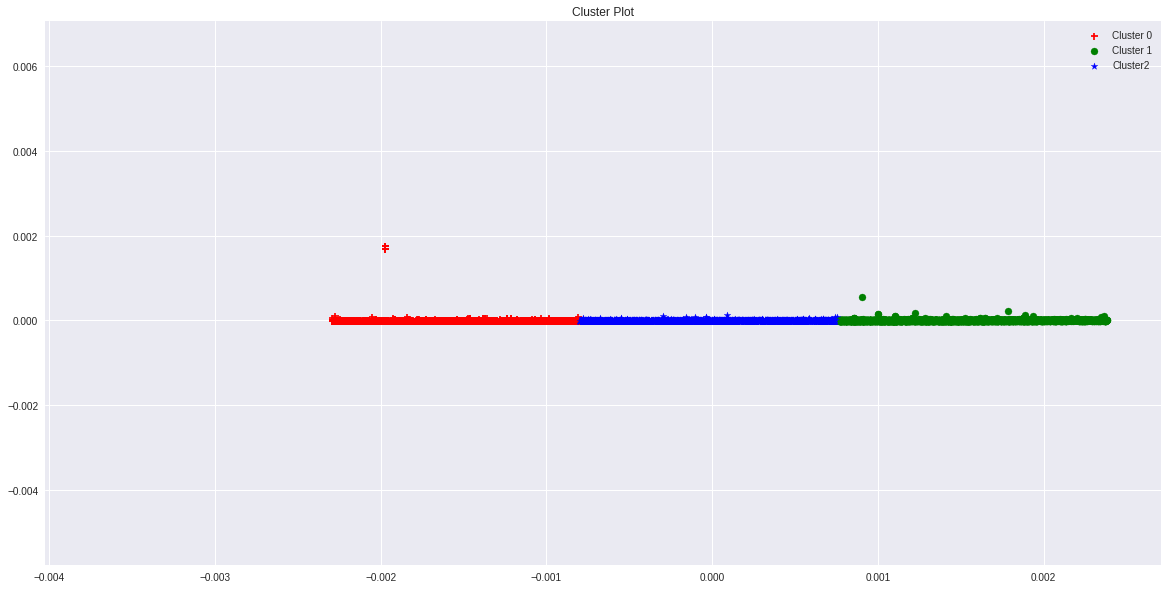

In [16]:
plt.figure(figsize=(20,10))
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(principal_data.values[i, 0], principal_data.values[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(principal_data.values[i, 0], principal_data.values[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(principal_data.values[i, 0], principal_data.values[i, 1], c='b', marker='*')
        
 
plt.legend([c1, c2, c3], ['Cluster 0', 'Cluster 1', 'Cluster2'])
plt.title('Cluster Plot')
plt.show()

In [0]:
data["labels"] = clusters

In [18]:
data.head(3)

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id,labels
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a,2
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN,2
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN,2


In [19]:
data.groupby(['labels']).mean()["Income"]

labels
0    47241.143400
1    47886.761661
2    44827.131786
Name: Income, dtype: float64

In [20]:
data.describe()

,Unnamed: 0,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,score,demofeatures_debt_to_income_ratio,demofeatures_net_income_band,...,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,obiResult_score,labels
count,11993.000000,11993.000000,1.199300e+04,1.199300e+04,11993.000000,11993.000000,11991.0,6298.000000,3153.000000,11991.000000,...,11144.000000,1.114400e+04,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11991.000000,5822.000000,11993.000000
mean,5996.000000,201834.269324,4.911094e+08,3.027053e+11,1.363796,46642.279420,0.0,0.777141,26.312496,90615.878576,...,4.353823,2.704500e+04,0.764923,0.746803,92.627782,305.839375,713.127423,38056.376651,413.082520,1.010006
std,3462.225224,40.320754,2.894867e+08,3.601095e+08,0.933842,61624.847966,0.0,0.094578,41.326608,113404.983591,...,36.842542,3.278040e+05,0.296635,0.285299,98.067731,605.626409,1305.949015,24196.240819,13.166226,0.815584
min,0.000000,201806.000000,8.417000e+03,3.018331e+11,1.000000,18.500000,0.0,0.294221,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,302.700000,0.000000
25%,2998.000000,201809.000000,2.353686e+08,3.024286e+11,1.000000,15000.000000,0.0,0.713277,13.000000,25000.000000,...,0.000000,6.294000e+03,0.745305,0.731833,48.000000,108.000000,266.000000,22374.775040,407.770000,0.000000
50%,5996.000000,201812.000000,4.834831e+08,3.028665e+11,1.000000,25000.000000,0.0,0.784506,21.000000,50000.000000,...,0.000000,1.014450e+04,0.883366,0.856220,64.000000,141.000000,329.000000,32267.467786,412.410000,1.000000
75%,8994.000000,201901.000000,7.462408e+08,3.029956e+11,1.000000,50000.000000,0.0,0.852741,32.200000,100000.000000,...,0.000000,2.136075e+04,0.948669,0.917775,99.000000,266.000000,627.000000,46514.401003,419.470000,2.000000
max,11992.000000,201902.000000,9.999118e+08,3.031443e+11,13.000000,801776.700000,0.0,0.978750,767.910000,750000.000000,...,1672.000000,3.423303e+07,1.000000,1.000000,2276.000000,12032.000000,26177.000000,277381.237491,612.850000,2.000000


In [21]:
print(data.columns)

Index([u'Unnamed: 0', u'createdAt_Month', u'Reason', u'application_id',
       u'SystemCustomerID', u'SystemLoanID', u'income_source',
       u'income_verified', u'next_loan_number', u'country',
       ...
       u'callFeatures_no_calls_over_zero_secs_out',
       u'callFeatures_no_calls_out', u'predictedIncome', u'installationId',
       u'obiResult_scorecard', u'obiResult_score', u'obiResult_riskLevel',
       u'obiResult_ratingClass', u'obiResult_ncngav2Id', u'labels'],
      dtype='object', length=291)


# Group Clients By income source and get count of each

In [22]:
data.groupby(['income_source']).count()

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id,labels
income_source,,,,,,,,,,,,,,,,,,,,,
credit,8400,8400,8400,8400,8400,8400,8400,8400,8400,8400,...,7926,7926,8398,8398,4319,4319,4319,4015,4101,8400
ivy,404,404,404,404,404,404,404,404,404,404,...,248,248,404,404,240,240,240,189,189,404
legacy-income,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,1
pension,993,993,993,993,993,993,993,993,993,993,...,877,877,993,992,362,362,362,338,340,993
salary,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,...,2092,2092,2195,2195,901,901,901,822,839,2195
